# 範例

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

img = cv2.imread('../data/lena.png')

## 模糊

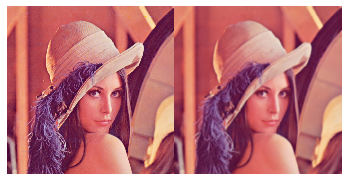

In [2]:
img_blur = img.copy()

# 重複多次 Gaussian 模糊的操作來加深模糊的程度
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)
img_blur = cv2.GaussianBlur(img_blur, (5, 5), 0)

#　組合 + 顯示圖片
img_show = np.hstack((img, img_blur))

plt.axis('off')
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
# while True:
#     cv2.imshow('Gaussian Blur', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break

## 邊緣檢測

### 組合 x-axis, y-axis 的影像合成

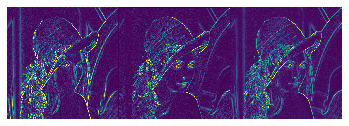

In [3]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向做 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)
img_sobel_x = cv2.convertScaleAbs(img_sobel_x)

# 對 y 方向做 Sobel 邊緣檢測
img_sobel_y = cv2.Sobel(img_grey, cv2.CV_16S, dx=0, dy=1, ksize=3)
img_sobel_y = cv2.convertScaleAbs(img_sobel_y)

# x, y 方向的邊緣檢測後的圖各以一半的全重進行合成
img_sobel_combine = cv2.addWeighted(img_sobel_x, 0.5, img_sobel_y, 0.5, 0)

#　組合 + 顯示圖片
img_show = np.hstack((img_sobel_x, img_sobel_y, img_sobel_combine))

plt.axis('off')
plt.imshow(img_show)
# while True:
#     cv2.imshow('Edge Detection', img_show)
#     k = cv2.waitKey(0)
#     if k == 27:
#         cv2.destroyAllWindows()
#         break